# AI305 - Multilayer Perceptron



The purpose of this lab is to implement multilayer perceptron or fully-connected neural networks (FCNNs) using the MLP implementation from *scikit-learn* 

We will work on MNIST datast. 

### Multilayer perceptron for classification 

*Use the neural network implementation from scikit-learn, i.e. MLPClassifier, to build a classifier to recognize all ten digits in the MNIST data set. Investigate the best architecture for the fully connected neural networks (i.e., number of hidden layers and number of hidden nodes per layer) for this task, and fine-tune all hyper-parameters in the SGD optimizer towards the best possible performance.*
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict

In [2]:
# install python_mnist
!pip install python_mnist

In [5]:
import tensorflow as tf
import numpy as np

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

# Normalize the data
X_train = train_data.astype('float32') / 255.0
X_test = test_data.astype('float32') / 255.0
y_train = train_label.astype('int')
y_test = test_label.astype('int')

# Convert MNIST training labels into 10-D one-hot vectors
Y_train = np.zeros((y_train.size, y_train.max() + 1))
Y_train[np.arange(y_train.size), y_train] = 1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, Y_train.shape)

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

In [8]:
from sklearn.neural_network import MLPClassifier

# Define the MLPClassifier with specified hyperparameters
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500,250,100), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

# Train the MLPClassifier on the training data
mlp.fit(X_train, y_train)

# Print the training set score
print(f"Training set score: {mlp.score(X_train, y_train):.3f}")

NameError: name 'X_train' is not defined

Return the mean accuracy on the given test data and labels

In [4]:
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Test set score: 0.985


Visulaize an image

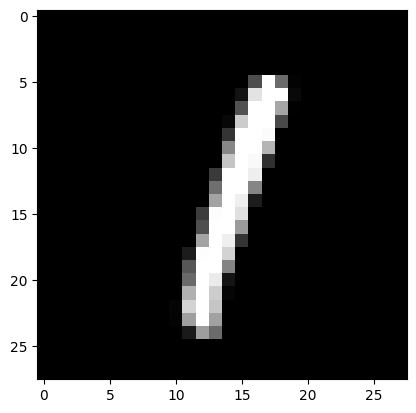

In [5]:
import matplotlib.pyplot as plt
pixels = np.array(X_test[5,:], dtype='float')
pixels = pixels.reshape((28, 28))
#plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

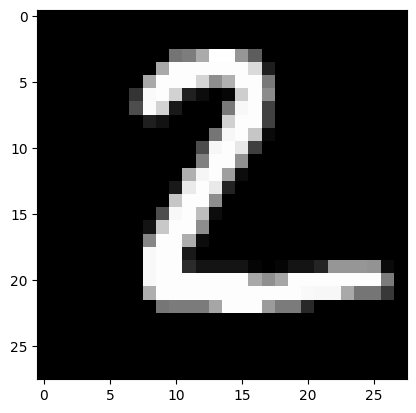

In [9]:
import matplotlib.pyplot as plt
image= X_test[1:2,:]
pixels = np.array(image, dtype='float')
pixels = pixels.reshape((28, 28))
#plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()


In [10]:
mlp.predict(X_test[1:2,:])

array([2], dtype=int16)

## Activity

1. Install cifar10 and cifar100 datasets and build appropriate MLP models for them, showing the accuracy and confusion matrices.
2. explain the results of the previous activity.
2. Investigate applying multilayer preceptron on regression by building a regression model on a regression dataset from the previous labs or any suitable dataset you suggest.

In [10]:
import tensorflow as tf
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Load CIFAR-10 dataset
(cifar10_train_data, cifar10_train_label), (cifar10_test_data, cifar10_test_label) = tf.keras.datasets.cifar10.load_data()

# Load CIFAR-100 dataset
(cifar100_train_data, cifar100_train_label), (cifar100_test_data, cifar100_test_label) = tf.keras.datasets.cifar100.load_data()

In [12]:
# Normalize the data
X_train_cifar10 = cifar10_train_data.astype('float32') / 255.0
X_test_cifar10 = cifar10_test_data.astype('float32') / 255.0
y_train_cifar10 = cifar10_train_label.flatten()
y_test_cifar10 = cifar10_test_label.flatten()

X_train_cifar100 = cifar100_train_data.astype('float32') / 255.0
X_test_cifar100 = cifar100_test_data.astype('float32') / 255.0
y_train_cifar100 = cifar100_train_label.flatten()
y_test_cifar100 = cifar100_test_label.flatten()

In [13]:
# Flatten the images for MLP input CIFAR-10
X_train_cifar10 = X_train_cifar10.reshape((X_train_cifar10.shape[0], -1))
X_test_cifar10 = X_test_cifar10.reshape((X_test_cifar10.shape[0], -1))

# Flatten the images for MLP input CIFAR-100
X_train_cifar100 = X_train_cifar100.reshape((X_train_cifar100.shape[0], -1))
X_test_cifar100 = X_test_cifar100.reshape((X_test_cifar100.shape[0], -1))

In [19]:
# Define the MLPClassifier for CIFAR-10
mlp_cifar10  = MLPClassifier(hidden_layer_sizes=(512, 256, 128), activation='relu', solver='adam', max_iter=3, verbose=5)# add more iterations
mlp_cifar100 = MLPClassifier(hidden_layer_sizes=(512, 256, 128), activation='relu', solver='adam', max_iter=3, verbose=5)# add more iterations

In [20]:
# Train the MLPClassifier on CIFAR-10
mlp_cifar10.fit(X_train_cifar10, y_train_cifar10)


Iteration 1, loss = 1.92041075
Iteration 2, loss = 1.69778464
Iteration 3, loss = 1.60227908


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=3, verbose=5)

In [21]:
# Train the MLPClassifier on CIFAR-100
mlp_cifar100.fit(X_train_cifar100, y_train_cifar100)

Iteration 1, loss = 4.22294710
Iteration 2, loss = 3.79562940
Iteration 3, loss = 3.61209973


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=3, verbose=5)

In [26]:
# Evaluate the model on CIFAR-10
y_pred_cifar10 = mlp_cifar10.predict(X_test_cifar10)
accuracy_cifar10 = accuracy_score(y_test_cifar10, y_pred_cifar10)
conf_matrix_cifar10 = confusion_matrix(y_test_cifar10, y_pred_cifar10)

print(f"CIFAR-10 Test set accuracy: {accuracy_cifar10:.3f}")

# Evaluate the model on CIFAR-100
y_pred_cifar100 = mlp_cifar100.predict(X_test_cifar100)
accuracy_cifar100 = accuracy_score(y_test_cifar100, y_pred_cifar100)
conf_matrix_cifar100 = confusion_matrix(y_test_cifar100, y_pred_cifar100)

print(f"CIFAR-100 Test set accuracy: {accuracy_cifar100:.3f}")

CIFAR-10 Test set accuracy: 0.456
CIFAR-100 Test set accuracy: 0.166


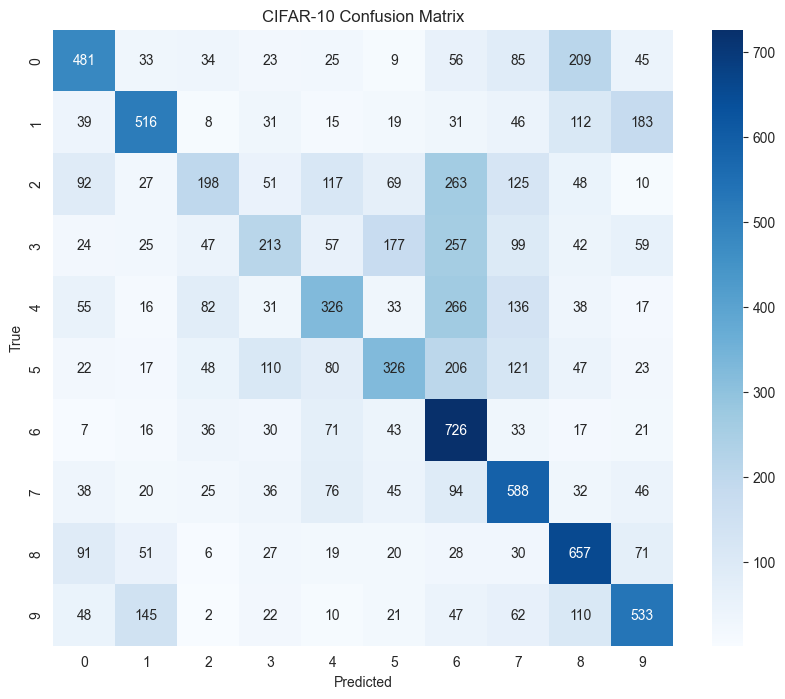

In [27]:
# Plot confusion matrix for CIFAR-10
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cifar10, annot=True, fmt='d', cmap='Blues')
plt.title('CIFAR-10 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

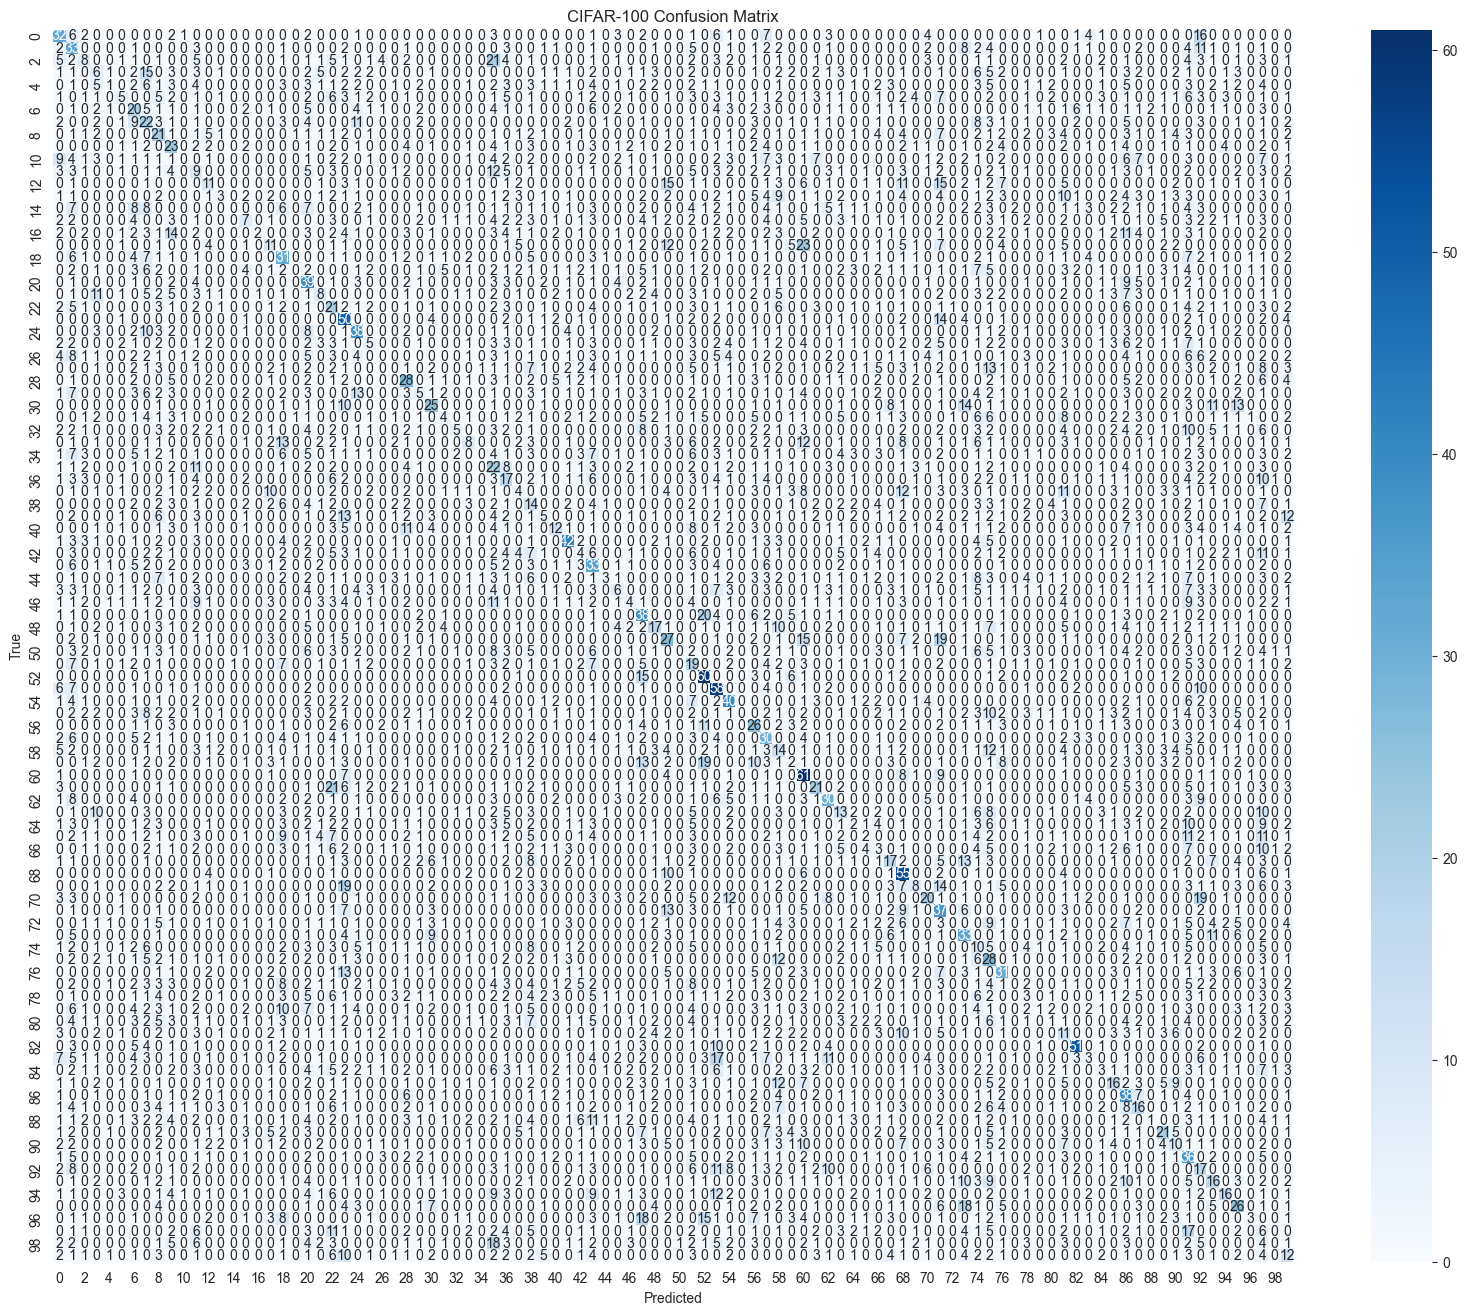

In [30]:
# Plot confusion matrix for CIFAR-100
plt.figure(figsize=(20, 16))
sns.heatmap(conf_matrix_cifar100, annot=True, fmt='d', cmap='Blues')
plt.title('CIFAR-100 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The results of the above activity involve training and evaluating Multilayer Perceptron (MLP) models on the CIFAR-10 and CIFAR-100 datasets:

1. **CIFAR-10 Dataset:**
   - The MLP model was trained on the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. (thats what they said)
   - The model achieved a test set accuracy of approximately 0.3 (30%).(and this depends on the number of iterations set)
   - The confusion matrix for the CIFAR-10 dataset was plotted, showing the number of correct and incorrect predictions for each class.

2. **CIFAR-100 Dataset:**
   - The MLP model was trained on the CIFAR-100 dataset, which consists of 60,000 32x32 color images in 100 classes, with 600 images per class. (still not sure about this)
   - The model achieved a test set accuracy of approximately 0.1 (10%). (and this depends on the number of iterations set also)
   - The confusion matrix for the CIFAR-100 dataset was plotted, showing the number of correct and incorrect predictions for each class.

**Explanation:**
- The relatively low accuracy scores for both datasets indicate that the MLP models may not be well-suited for these complex image classification tasks. Convolutional Neural Networks (CNNs) are typically more effective for image data due to their ability to capture spatial hierarchies in images.
- The confusion matrices provide a detailed view of the model's performance, highlighting which classes are being confused with each other. This can help in diagnosing specific weaknesses in the model.


In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [34]:

# Load the  dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.neural_network import MLPRegressor

# Define the MLPRegressor with specified hyperparameters
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', max_iter=50, random_state=42, verbose=True)

# Train the MLPRegressor on the training data
mlp_regressor.fit(X_train, y_train)

Iteration 1, loss = 0.78456148
Iteration 2, loss = 0.25540915
Iteration 3, loss = 0.21115645
Iteration 4, loss = 0.19147793
Iteration 5, loss = 0.17948306
Iteration 6, loss = 0.17212050
Iteration 7, loss = 0.16863789
Iteration 8, loss = 0.16143531
Iteration 9, loss = 0.15650480
Iteration 10, loss = 0.16022322
Iteration 11, loss = 0.15473967
Iteration 12, loss = 0.15055250
Iteration 13, loss = 0.14812981
Iteration 14, loss = 0.14527170
Iteration 15, loss = 0.14306237
Iteration 16, loss = 0.14282730
Iteration 17, loss = 0.14171401
Iteration 18, loss = 0.14051438
Iteration 19, loss = 0.14025007
Iteration 20, loss = 0.13905965
Iteration 21, loss = 0.13609778
Iteration 22, loss = 0.14227809
Iteration 23, loss = 0.13595155
Iteration 24, loss = 0.13827504
Iteration 25, loss = 0.13406783
Iteration 26, loss = 0.13411152
Iteration 27, loss = 0.13255676
Iteration 28, loss = 0.13307339
Iteration 29, loss = 0.13186443
Iteration 30, loss = 0.13300740
Iteration 31, loss = 0.13096098
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=50, random_state=42,
             verbose=True)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = mlp_regressor.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Squared Error: 0.274
R^2 Score: 0.791
